In [41]:
# 导入所需的工具包
import numpy as np
import matplotlib.pyplot as plt

# tf中使用工具包
import tensorflow as tf
# 构建模型
from tensorflow.keras.models import Sequential
# 相关的网络层
from tensorflow.keras.layers import Dense,Dropout,Activation,BatchNormalization
# 导入辅助工具包
from tensorflow.keras import utils
# 正则化
from tensorflow.keras import regularizers
# 数据集
from tensorflow.keras.datasets import mnist
import tensorflow.keras.layers as layers

# 数据加载


In [27]:
# 加载数据集
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [28]:
x_train.shape

(60000, 28, 28)

In [29]:
x_test.shape

(10000, 28, 28)

In [30]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

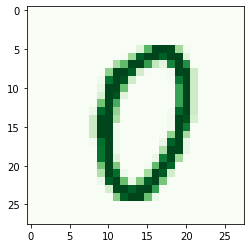

In [31]:
# 显示数据
plt.figure()
plt.imshow(x_train[1000],cmap="Greens")

In [32]:
y_train[1000]

0

# 数据处理

In [33]:
# 数据维度的调整
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [34]:
# 数据类型调整
x_train = x_train.astype('float32')
x_test = x_test.astype("float32")

In [35]:
# 归一化
x_train = x_train/255
x_test = x_test/255

In [36]:
# 将目标值转换成热编码的形式
y_train = utils.to_categorical(y_train,10)
y_test = utils.to_categorical(y_test,10)

In [49]:
y_train.shape

(60000, 10)

# 模型构建

In [69]:
# 使用序列模型进行构建
model = Sequential()
# 全连接层：2个隐层，一个输出层
# 第一个隐层:512个神经元，先激活后BN，随机失活
model.add(Dense(512,activation = "relu",input_shape=(784,)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
# 第二个隐层：512个神经元，先BN后激活，随机失活
model.add(Dense(512,kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))
# 输出层
model.add(Dense(10,activation="softmax"))

In [70]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_12 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 512)               262656    
_________________________________________________________________
batch_normalization_13 (Batc (None, 512)               2048      
_________________________________________________________________
activation_6 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)              

# 模型编译

In [71]:
# 损失函数，优化器，评价指标
model.compile(loss= tf.keras.losses.categorical_crossentropy,optimizer = tf.keras.optimizers.Adam(),
              metrics=tf.keras.metrics.Accuracy())

# 模型训练

In [72]:
# 使用fit,指定训练集，epochs,batch_size,val,verbose
# batch_size是每次送入模型中样本个数，epochs是所样本的迭代次数，并指明验证数据集
history = model.fit(x_train,y_train,epochs=4,validation_data=(x_test,y_test),verbose=1)

Epoch 1/4
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6842 - accuracy: 0.0000e+00 - val_loss: 0.4039 - val_accuracy: 0.0000e+00
Epoch 2/4
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4381 - accuracy: 0.0000e+00 - val_loss: 0.3235 - val_accuracy: 0.0000e+00
Epoch 3/4
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3602 - accuracy: 0.0000e+00 - val_loss: 0.3304 - val_accuracy: 0.0000e+00
Epoch 4/4
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3244 - accuracy: 0.0000e+00 - val_loss: 0.2818 - val_accuracy: 0.0000e+00


In [62]:
history.history

{'loss': [0.43799319863319397,
  0.33861202001571655,
  0.31155142188072205,
  0.291983425617218],
 'accuracy': [0.0006900000153109431,
  0.0006399999838322401,
  0.0008333333535119891,
  0.0007433333084918559],
 'val_loss': [0.3158833086490631,
  0.28916501998901367,
  0.2606751620769501,
  0.28022289276123047],
 'val_accuracy': [0.0005300000193528831,
  0.0019199999514967203,
  0.001550000044517219,
  0.0011699999449774623]}

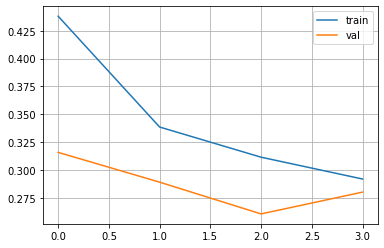

In [63]:
# 损失函数
plt.figure()
plt.plot(history.history['loss'],label="train")
plt.plot(history.history["val_loss"],label="val")
plt.legend()
plt.grid()

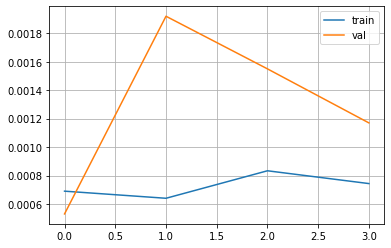

In [64]:
# 准确率
plt.figure()
plt.plot(history.history['accuracy'],label="train")
plt.plot(history.history["val_accuracy"],label="val")
plt.legend()
plt.grid()

In [56]:
# 回调函数
tensorboard = tf.keras.callbacks.TensorBoard(log_dir = "./graph")

In [57]:
# 训练
history = model.fit(x_train,y_train,epochs=4,validation_data=(x_test,y_test),batch_size=128,
                    verbose=1,callbacks=[tensorboard])

Epoch 1/4
  1/469 [..............................] - ETA: 0s - loss: 0.1043 - accuracy: 0.0109WARNING:tensorflow:From /opt/anaconda3/envs/dlcv/lib/python3.6/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
469/469 [==============================] - 2s 5ms/step - loss: 0.1092 - accuracy: 0.0093 - val_loss: 0.1541 - val_accuracy: 0.0091
Epoch 2/4
469/469 [==============================] - 2s 4ms/step - loss: 0.1070 - accuracy: 0.0096 - val_loss: 0.1400 - val_accuracy: 0.0076
Epoch 3/4
469/469 [==============================] - 2s 4ms/step - loss: 0.1059 - accuracy: 0.0097 - val_loss: 0.1472 - val_accuracy: 0.0090
Epoch 4/4
469/469 [==============================] - 2s 5ms/step - loss: 0.1018 - accuracy: 0.0111 - val_loss: 0.1462 - val_accuracy: 0.0136


# 模型评估

In [65]:
model.evaluate(x_test,y_test,verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.2802 - accuracy: 0.0012


[0.28022289276123047, 0.0011699999449774623]

# 模型保存

In [66]:
# 保存
model.save("model.h5")

In [67]:
# 记载
loadmodel = tf.keras.models.load_model("model.h5")

In [68]:
loadmodel.evaluate(x_test,y_test,verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.2802 - accuracy: 0.0012


[0.28022289276123047, 0.0011699999449774623]